<a href="https://colab.research.google.com/github/hitanshu5/Image-Processing-and-Computer-Vision/blob/main/IPCVEXP8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NAME: HITANSHU SHAH SAPID: 60009220164

In [ ]:
import numpy as np
from scipy.fft import fft2, ifft2
from scipy.signal.windows import gaussian
import matplotlib.pyplot as plt
import cv2

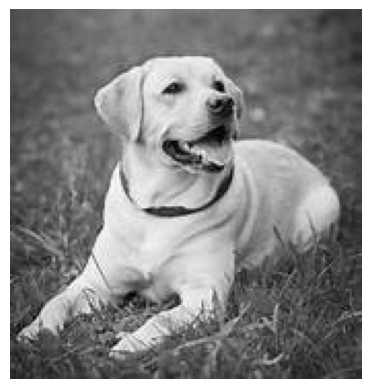

In [ ]:
image = cv2.imread('/content/dog.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
def display_results(original, filtered, filter_type):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered, cmap='gray')
    plt.title(f'Filtered Image ({filter_type})')
    plt.axis('off')

    plt.show()

In [ ]:
def multiply_by_minus_one_power(image):
    r, c = image.shape
    mod_img = np.zeros((r, c), dtype=np.float32)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            mod_img[i, j] = image[i, j] * np.power(-1, i + j)

    return mod_img

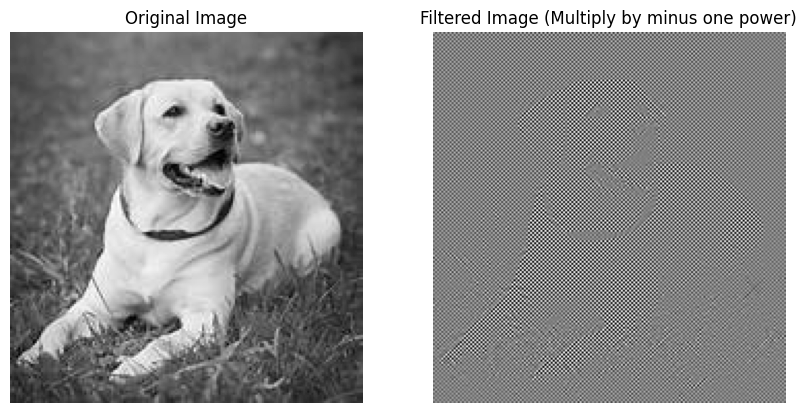

In [ ]:
multiplied_by_minus_one_image = multiply_by_minus_one_power(image)
display_results(image, multiplied_by_minus_one_image, 'Multiply by minus one power')

In [ ]:
def ideal_filter(shape, cutoff, type='low'):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    u, v = np.meshgrid(np.arange(cols), np.arange(rows))
    d = np.sqrt((u - ccol)**2 + (v - crow)**2)
    mask = d <= cutoff
    return mask if type == 'low' else ~mask

In [ ]:
def gaussian_filter(shape, sigma, type='low'):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    u, v = np.meshgrid(np.arange(cols), np.arange(rows))
    d = np.sqrt((u - ccol)**2 + (v - crow)**2)
    h = np.exp(-(d**2) / (2 * sigma**2))
    return h if type == 'low' else 1 - h

In [ ]:
def apply_frequency_domain_filter(image, filter_func, **filter_params):
    preprocessed = multiply_by_minus_one_power(image)

    f_uv = fft2(preprocessed)

    h_uv = filter_func(image.shape, **filter_params)
    filtered_f_uv = f_uv * h_uv

    filtered_spatial = ifft2(filtered_f_uv)

    result = np.real(filtered_spatial)
    result = multiply_by_minus_one_power(result)

    return result

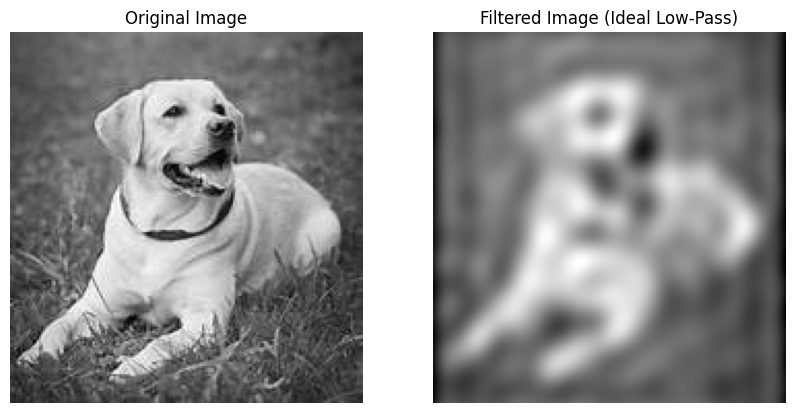

In [ ]:
ideal_low_pass = apply_frequency_domain_filter(image, ideal_filter, cutoff=10, type='low')
display_results(image, ideal_low_pass, "Ideal Low-Pass")

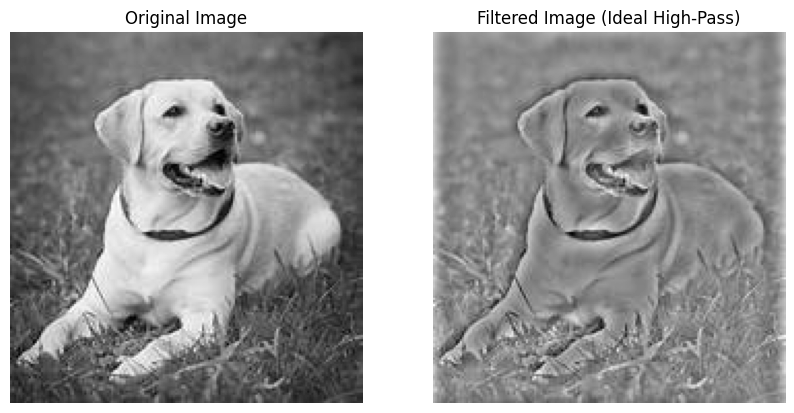

In [ ]:
ideal_high_pass = apply_frequency_domain_filter(image, ideal_filter, cutoff=10, type='high')
display_results(image, ideal_high_pass, "Ideal High-Pass")

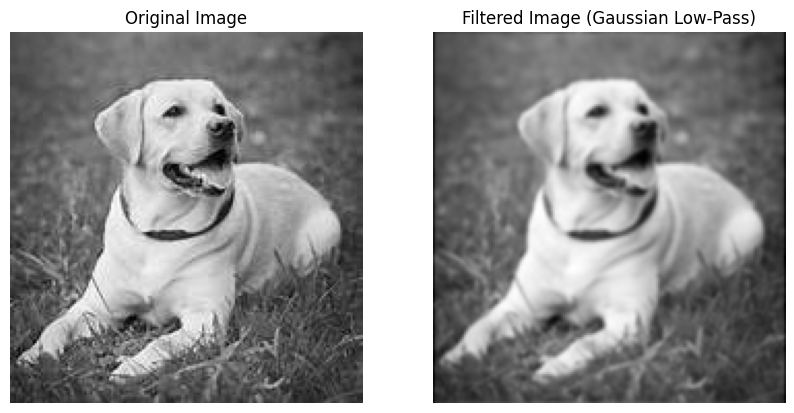

In [ ]:
gaussian_low_pass = apply_frequency_domain_filter(image, gaussian_filter, sigma=30, type='low')
display_results(image, gaussian_low_pass, "Gaussian Low-Pass")

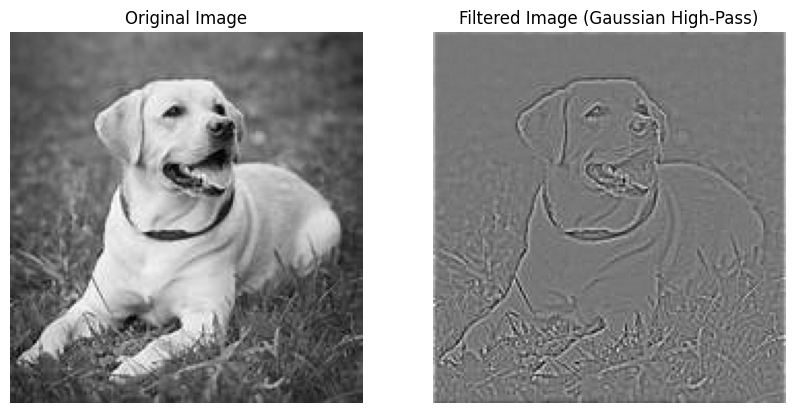

In [ ]:
gaussian_high_pass = apply_frequency_domain_filter(image, gaussian_filter, sigma=30, type='high')
display_results(image, gaussian_high_pass, "Gaussian High-Pass")

# **CONCLUSION**

### Based on the experimental results, it is evident that frequency domain filters are powerful tools for image processing and analysis. By operating on the Fourier transform of an image, these filters can selectively modify different frequency components, allowing for a wide range of effects to be achieved.

### **Low-pass filters** proved to be effective in smoothing images and reducing noise by attenuating high-frequency components.
### **High-pass filters** enhanced edges and details by amplifying high-frequency components.
### **Band-pass filters** isolated specific frequency bands, allowing for targeted modifications to image features.
### The choice of frequency domain filter depends on the specific requirements of the application. For instance, low-pass filters might be suitable for tasks such as image denoising and blurring, while high-pass filters could be useful for edge detection and sharpening.

# **APPLICATION**

### The applications of frequency domain filters are vast and diverse, spanning various fields of image processing and computer vision. Some potential applications include:

### **Medical Image Analysis:** Frequency domain filters can be used for tasks such as noise reduction, edge detection, and feature extraction in medical images.
### **Industrial Inspection:** Defects in manufactured products can be identified using frequency domain filters.
### **Remote sensing:** Frequency domain filters can be applied to analyze satellite imagery for land cover classification, urban planning, and natural disaster monitoring.
### **Image enhancement:** Frequency domain filters can be used to improve the quality of images by removing noise, enhancing contrast, and sharpening edges.
### **Image compression:** Frequency domain filters are used in image compression techniques such as JPEG to reduce the size of images while preserving their visual quality.